Task 1 

1- The aes are income on the x-axis, life expectancy on the Y-axis. The colored regions are divided into 4 section, and the size would the population. 

2- Importing the data. 

In [1]:
import pandas as pd

# Reading the data 
gapminder_1 = pd.read_csv('C:\\Users\\mehrp\\OneDrive\\Desktop\\Courses\\Fall23\\MachineLearning\\Lab1\\Lab1VSCode\\q1data_2010.csv')
gapminder_1.head()


,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


3. Recreate the plot as best you can using plotnine

c:\Users\mehrp\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_text : Removed 1 rows containing missing values.
c:\Users\mehrp\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


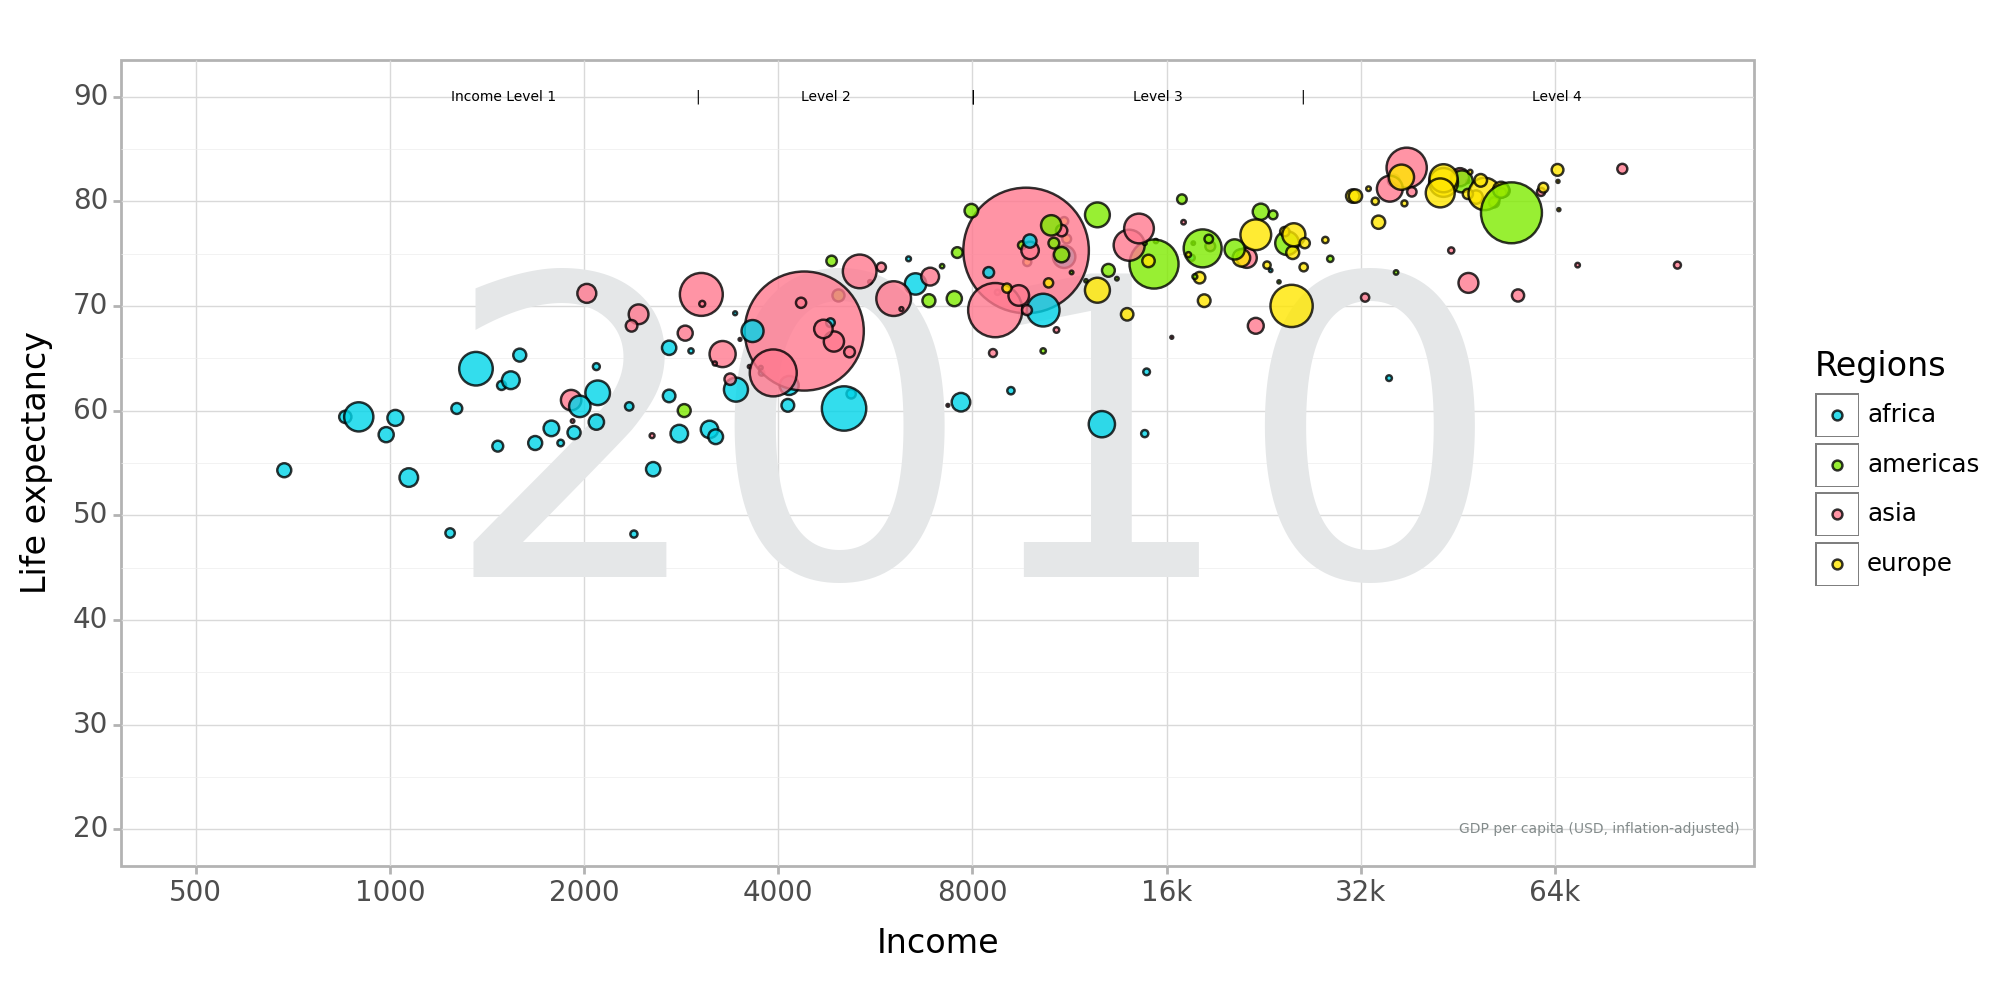

In [2]:
from plotnine import ggplot, geom_point, aes, ylab, xlab, theme_light, scale_y_continuous, scale_x_continuous, scale_fill_manual, guides 
from plotnine import* 

filtered1 = gapminder_1.dropna(subset=["income","life_exp","population","four_regions"])

region_colors_plot1 = {
    'europe': '#FFE600',
    'asia': '#FF798F',
    'americas': '#7FEB00',
    'africa': '#00D5E9'
}


plot1 = (
    ggplot(filtered1, aes(x="income", y="life_exp", fill="factor(four_regions)", size="population"))
   
    + annotate("text", x=75000, y=20, label="GDP per capita (USD, inflation-adjusted)", color = '#838B8B', size=5, family="sans") 
    
    + annotate("text", x=500, y=100, label="At birth", size=5, family="sans")
   
   
    + annotate('text', x=1500, y=90, label='Income Level 1', size=5, family="sans") #Threshold 1
    + annotate('text', x=3000, y=90, label='|', size=5, family="sans")
    
    + annotate('text', x=4750, y=90, label='Level 2', size=5, family="sans") #Threshold 2
    + annotate('text', x=8000, y=90, label='|', size=5, family="sans")
    
    + annotate('text', x=15500, y=90, label='Level 3', size=5, family="sans") #Threshold 3
    + annotate('text', x=8000, y=90, label='|', size=5, family="sans")
    
    + annotate('text', x=64500, y=90, label='Level 4', size=5, family="sans") #Threshold 4
    + annotate('text', x=26000, y=90, label='|', size=5, family="sans")
    
    + annotate('text', x=8000, y=55, label='2010', color = '#E5E7E8', size=150, family="sans") #Background 2010 
   
    + geom_point(alpha=0.8)  # Adjusting transparency
   
   # Size Adjustment for the Scatterplots
    + scale_size_area(max_size=25) 
    
    # X-Axis
    + scale_x_continuous(
                    limits = ([500,100000]),
                    breaks=([500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]), 
                    labels = [500, 1000, 2000, 4000, 8000, "16k", "32k", "64k"],
                    trans = 'log2')
    
    
    # Y-Axis
    + scale_y_continuous(
        limits=(20, 90),  # Adjusting y limits
        breaks=list(range(20,100, 10))  # Setting y-axis tick breaks
    )
    + scale_fill_manual(values=region_colors_plot1, name="Regions")  # Using custom colors
   
   
    + theme_light()  # Using a light theme
    
    #Re-Adjusting the size of the plot 
    + theme(figure_size=(10,5))
   
   
    + theme(
        legend_position="right",  # Positioning the legend to the right
        legend_title=element_text(size=12),  # Adjusting legend title size
        axis_title=element_text(size=12),  # Adjusting axis title size
        axis_text=element_text(size=10)  # Adjusting axis text size
    )
    + xlab("Income")
    + ylab("Life expectancy")
    + guides(size=False)
    
)

print(plot1)

4- What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

I used geom_boxplot for the first dataset, as you we can see, it does provide with a plot that is not fully uselss. For instance, we can see the average of each region and have a better undrestanding of the mean, SD, and outliers. However, in this case, the boxplot for "americas" is not providing all the information needed from this type of plot. In addition, the size of each box plot is vague and would be challgenging to grab insights from the data been represented quickly.

c:\Users\mehrp\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 5 rows containing non-finite values.
c:\Users\mehrp\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_text : Removed 1 rows containing missing values.


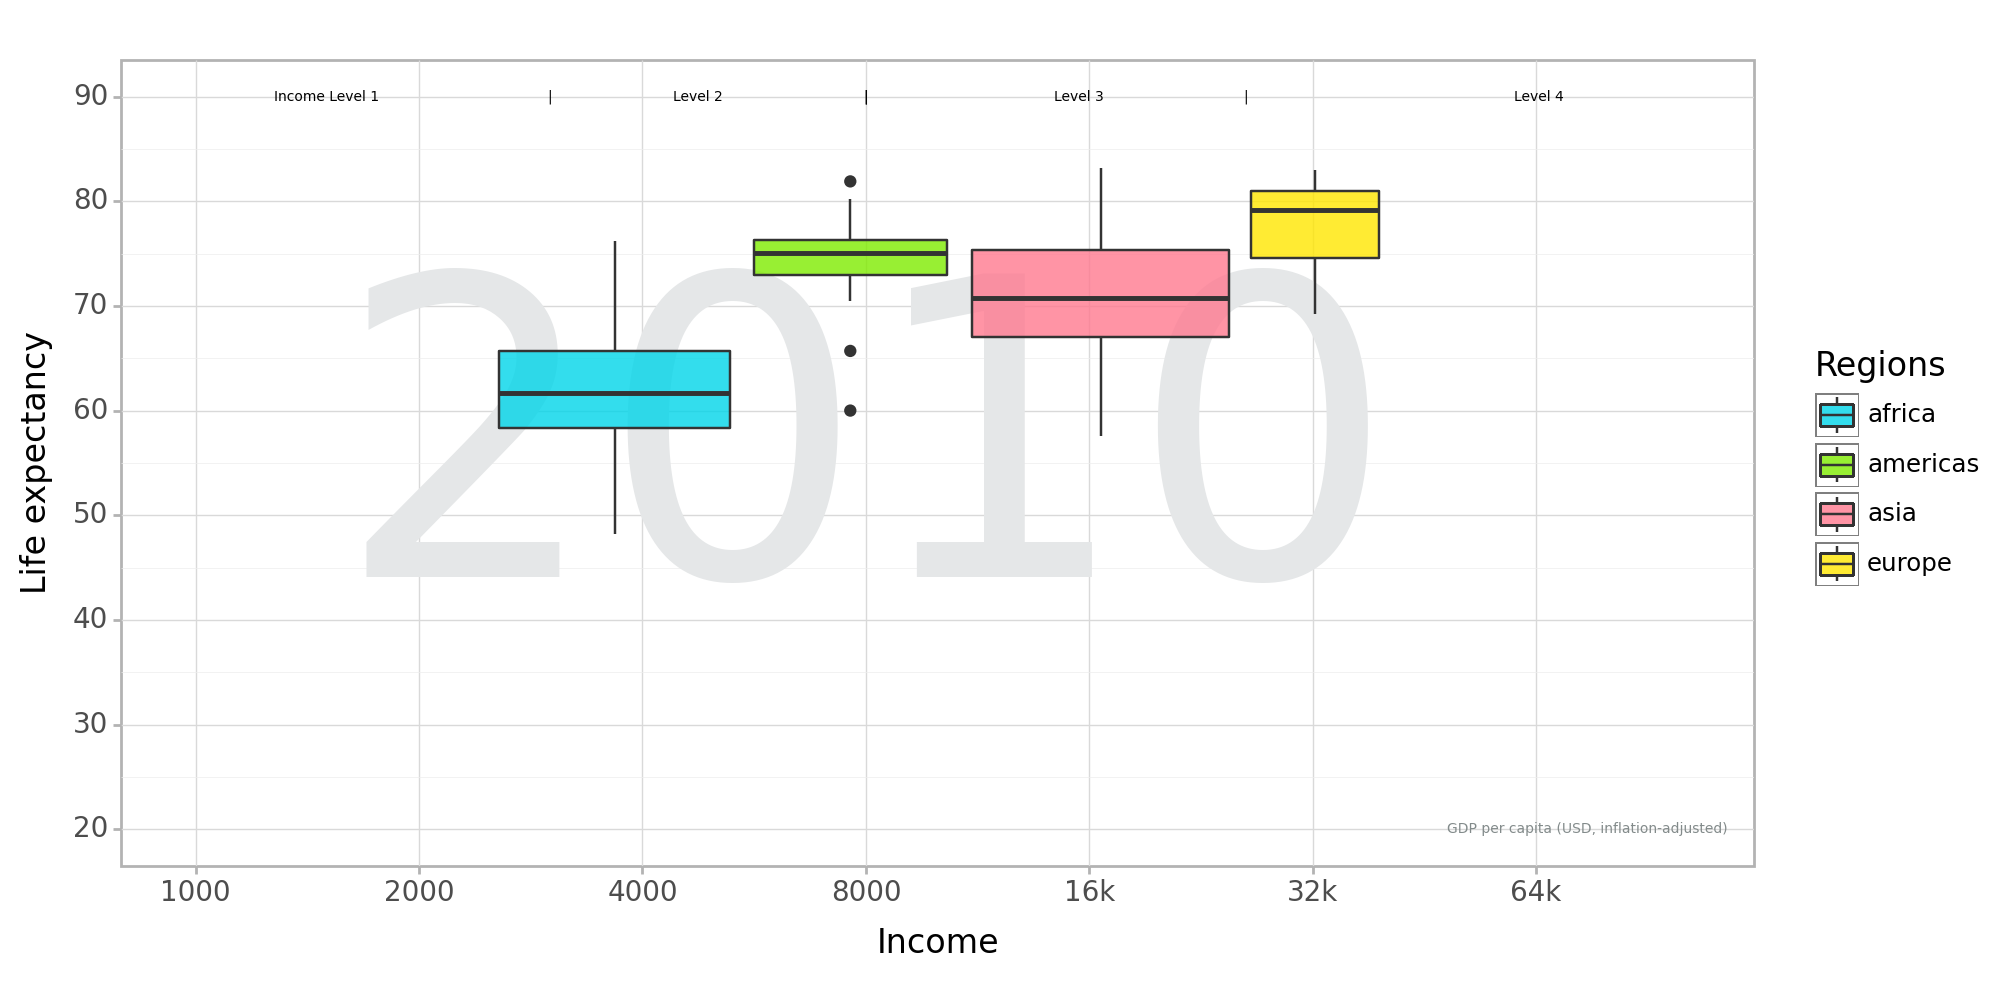

In [5]:
from plotnine import ggplot, geom_boxplot, aes, ylab, xlab, theme_light, scale_y_continuous, scale_x_continuous, scale_fill_manual, guides 
from plotnine import* 

filtered1 = gapminder_1.dropna(subset=["income","life_exp","population","four_regions"])

region_colors_plot1 = {
    'europe': '#FFE600',
    'asia': '#FF798F',
    'americas': '#7FEB00',
    'africa': '#00D5E9'
}


plot4 = (
    ggplot(filtered1, aes(x="income", y="life_exp", fill="factor(four_regions)", size="population"))
   
    + annotate("text", x=75000, y=20, label="GDP per capita (USD, inflation-adjusted)", color = '#838B8B', size=5, family="sans") 
    
    + annotate("text", x=500, y=100, label="At birth", size=5, family="sans")
   
   
    + annotate('text', x=1500, y=90, label='Income Level 1', size=5, family="sans") #Threshold 1
    + annotate('text', x=3000, y=90, label='|', size=5, family="sans")
    
    + annotate('text', x=4750, y=90, label='Level 2', size=5, family="sans") #Threshold 2
    + annotate('text', x=8000, y=90, label='|', size=5, family="sans")
    
    + annotate('text', x=15500, y=90, label='Level 3', size=5, family="sans") #Threshold 3
    + annotate('text', x=8000, y=90, label='|', size=5, family="sans")
    
    + annotate('text', x=64500, y=90, label='Level 4', size=5, family="sans") #Threshold 4
    + annotate('text', x=26000, y=90, label='|', size=5, family="sans")
    
    + annotate('text', x=8000, y=55, label='2010', color = '#E5E7E8', size=150, family="sans") #Background 2010 
   
    + geom_boxplot(alpha=0.8)  # Adjusting transparency
   
   # Size Adjustment for the Scatterplots
    + scale_size_area(max_size=25) 
    
    # X-Axis
    + scale_x_continuous(
                    limits = ([1000,100000]),
                    breaks=([1000, 2000, 4000, 8000, 16000, 32000, 64000]), 
                    labels = [1000, 2000, 4000, 8000, "16k", "32k", "64k"],
                    trans = 'log2')
    
    
    # Y-Axis
    + scale_y_continuous(
        limits=(20, 90),  # Adjusting y limits
        breaks=list(range(20,100, 10))  # Setting y-axis tick breaks
    )
    + scale_fill_manual(values=region_colors_plot1, name="Regions")  # Using custom colors
   
   
    + theme_light()  # Using a light theme
    
    #Re-Adjusting the size of the plot 
    + theme(figure_size=(10,5))
   
   
    + theme(
        legend_position="right",  # Positioning the legend to the right
        legend_title=element_text(size=12),  # Adjusting legend title size
        axis_title=element_text(size=12),  # Adjusting axis title size
        axis_text=element_text(size=10)  # Adjusting axis text size
    )
    + xlab("Income")
    + ylab("Life expectancy")
    + guides(size=False)
    
)

print(plot4)

Task 2 

1- The aes are exports on the x-axis, imports on the Y-axis. The fill colored regions are divided into 4 section, and the size would the energy. 

2- Importing the data.

In [26]:
import pandas as pd

# Reading the data 
gapminder_2 = pd.read_csv('C:\\Users\\mehrp\\OneDrive\\Desktop\\Courses\\Fall23\MachineLearning\\Lab1\\Lab1VSCode\\q2data_1997.csv')
gapminder_2.head()

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


3. Recreate the plot as best you can using plotnine.

c:\Users\mehrp\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


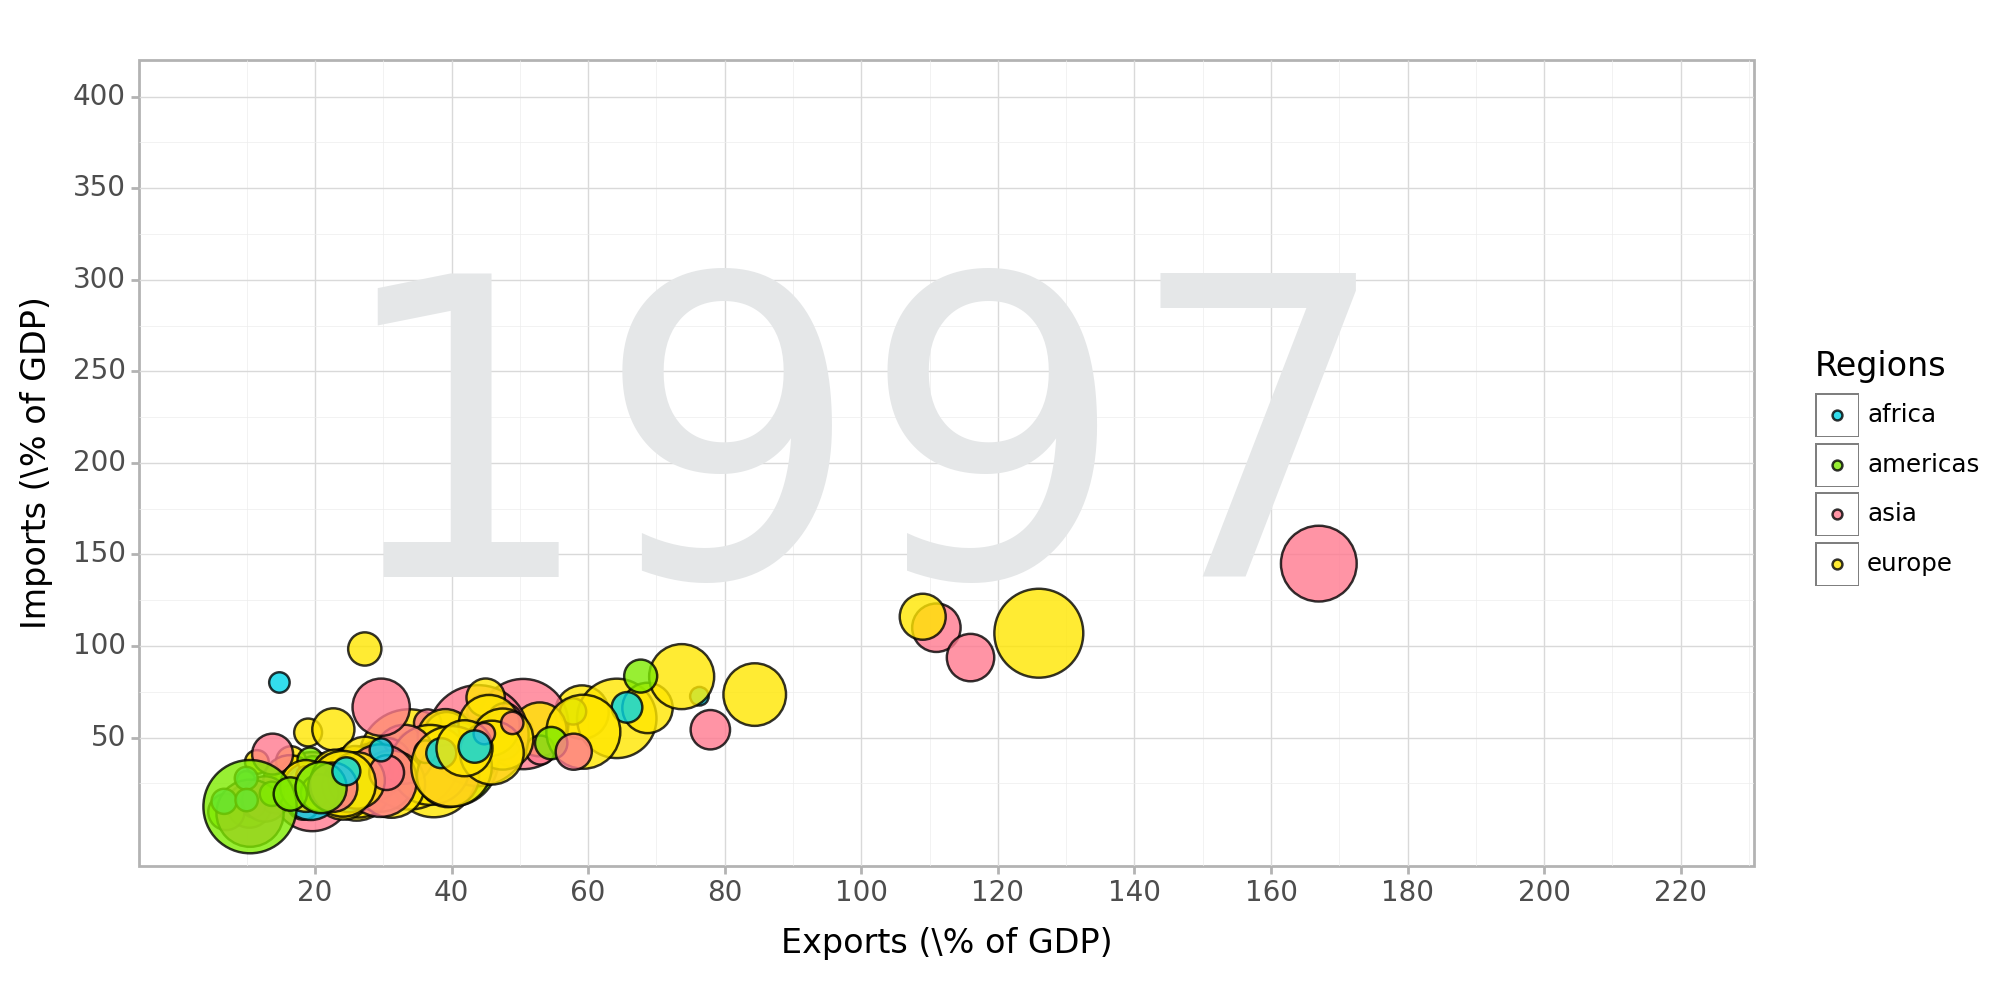

In [27]:
from plotnine import ggplot, geom_point, aes, ylab, xlab, theme_light, scale_y_continuous, scale_x_continuous, scale_fill_manual, guides, annotate, element_text, theme, scale_size_area

# Filter out rows with NaN values in the relevant columns, create a deep copy to avoid SettingWithCopyWarning
filtered2 = gapminder_2.dropna(subset=["exports", "imports", "energy", "four_regions"]).copy()

# Ensure the 'energy' column is numeric for size mapping
filtered2['energy'] = pd.to_numeric(filtered2['energy'], errors='coerce')

plot2 = (
    ggplot(filtered2, aes(x="exports", y="imports", fill="factor(four_regions)", size="energy"))
    
    + annotate('text', x=100, y=200, label='1997', color = '#E5E7E8', size=150, family="sans")

    + geom_point(alpha=0.8)  # Adjusting transparency
   
   # Size Adjustment for the Scatterplots
    + scale_size_area(max_size=20) 
    
    # X-Axis
    + scale_x_continuous(
                    limits = ([5,220]),
                    breaks=([20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]), 
                    labels = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220],
                    )
    
    
    # Y-Axis
    + scale_y_continuous(
        limits=(0, 400),  # Adjusting y limits
        breaks=list([50,100,150,200,250,300,350,400])  # Setting y-axis tick breaks
    )
    
    + scale_fill_manual(values=region_colors_plot1, name="Regions")  # Using custom colors
   
   
    + theme_light()  # Using a light theme
    
    #Re-Adjusting the size of the plot 
    + theme(figure_size=(10,5))
   
   
    + theme(
        legend_position="right",  # Positioning the legend to the right
        legend_title=element_text(size=12),  # Adjusting legend title size
        axis_title=element_text(size=12),  # Adjusting axis title size
        axis_text=element_text(size=10)  # Adjusting axis text size
    )
    + xlab("Exports (\% of GDP)")
    + ylab("Imports (\% of GDP)")
    + guides(size=False)
)    
    

print(plot2)

4- What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

In this try, I decided to use geom_bar to find the top 25 countries in terms of the amount of imports based on their GDPs and then see which one has the highest exports amount. As you can see the downside of the geom_bar is that I need to filter variables before doing the plot, and also the data may not be as interactive as it was in the geom_point created above. However, to break down things further I personally prefer geom_bar sometimes. 

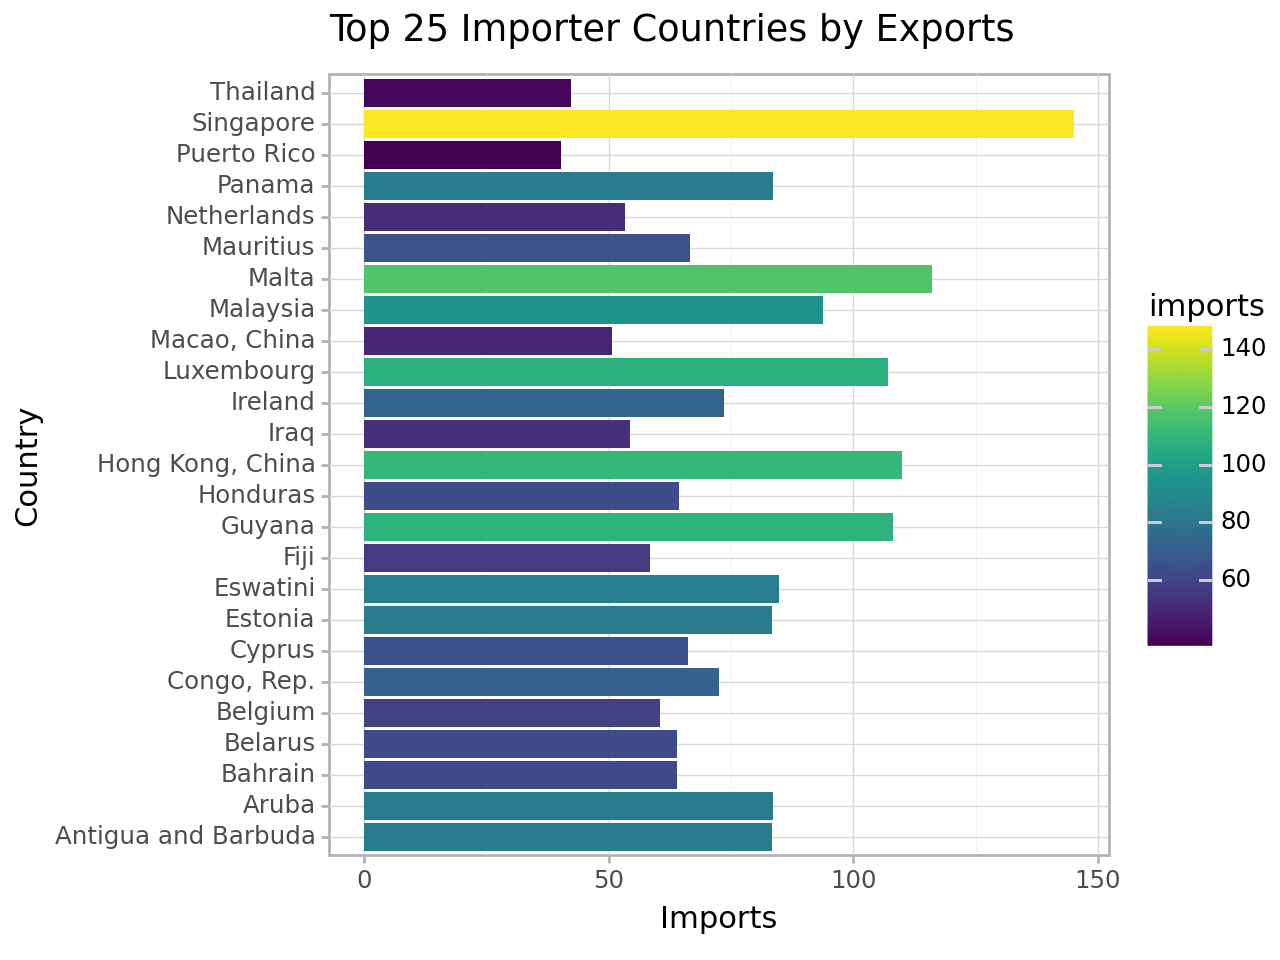

In [78]:
from plotnine import ggplot, aes, geom_bar, labs, theme_light, coord_flip

#top 25 countries by exports
top_countries_exports = gapminder_2.nlargest(25, 'exports')

# Sort these countries by their import values
top_countries_sorted_by_imports = top_countries_exports.sort_values(by='imports', ascending=False)

plot5 = (
   ggplot(top_countries_sorted_by_imports, aes(x='country', y='imports', fill='imports'))
    + geom_bar(stat='identity')
    + coord_flip()  # Flip the x and y axes for a horizontal bar chart
    + labs(title='Top 25 Importer Countries by Exports ', x='Country', y='Imports')
    + theme_light()
)
print(plot5)

Task 3

1- The aes are exports on the x-axis, imports on the Y-axis. The fill colored regions are divided into 4 section, and the size would the energy. 

2- Import the data. 

In [29]:
import pandas as pd

# Reading the data 
gapminder_3 = pd.read_csv('C:\\Users\\mehrp\\OneDrive\\Desktop\\Courses\\Fall23\MachineLearning\\Lab1\\Lab1VSCode\\q3data_2001.csv')
gapminder_3.head()

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia


3- Recreate the plot as best you can using plotnine.

c:\Users\mehrp\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


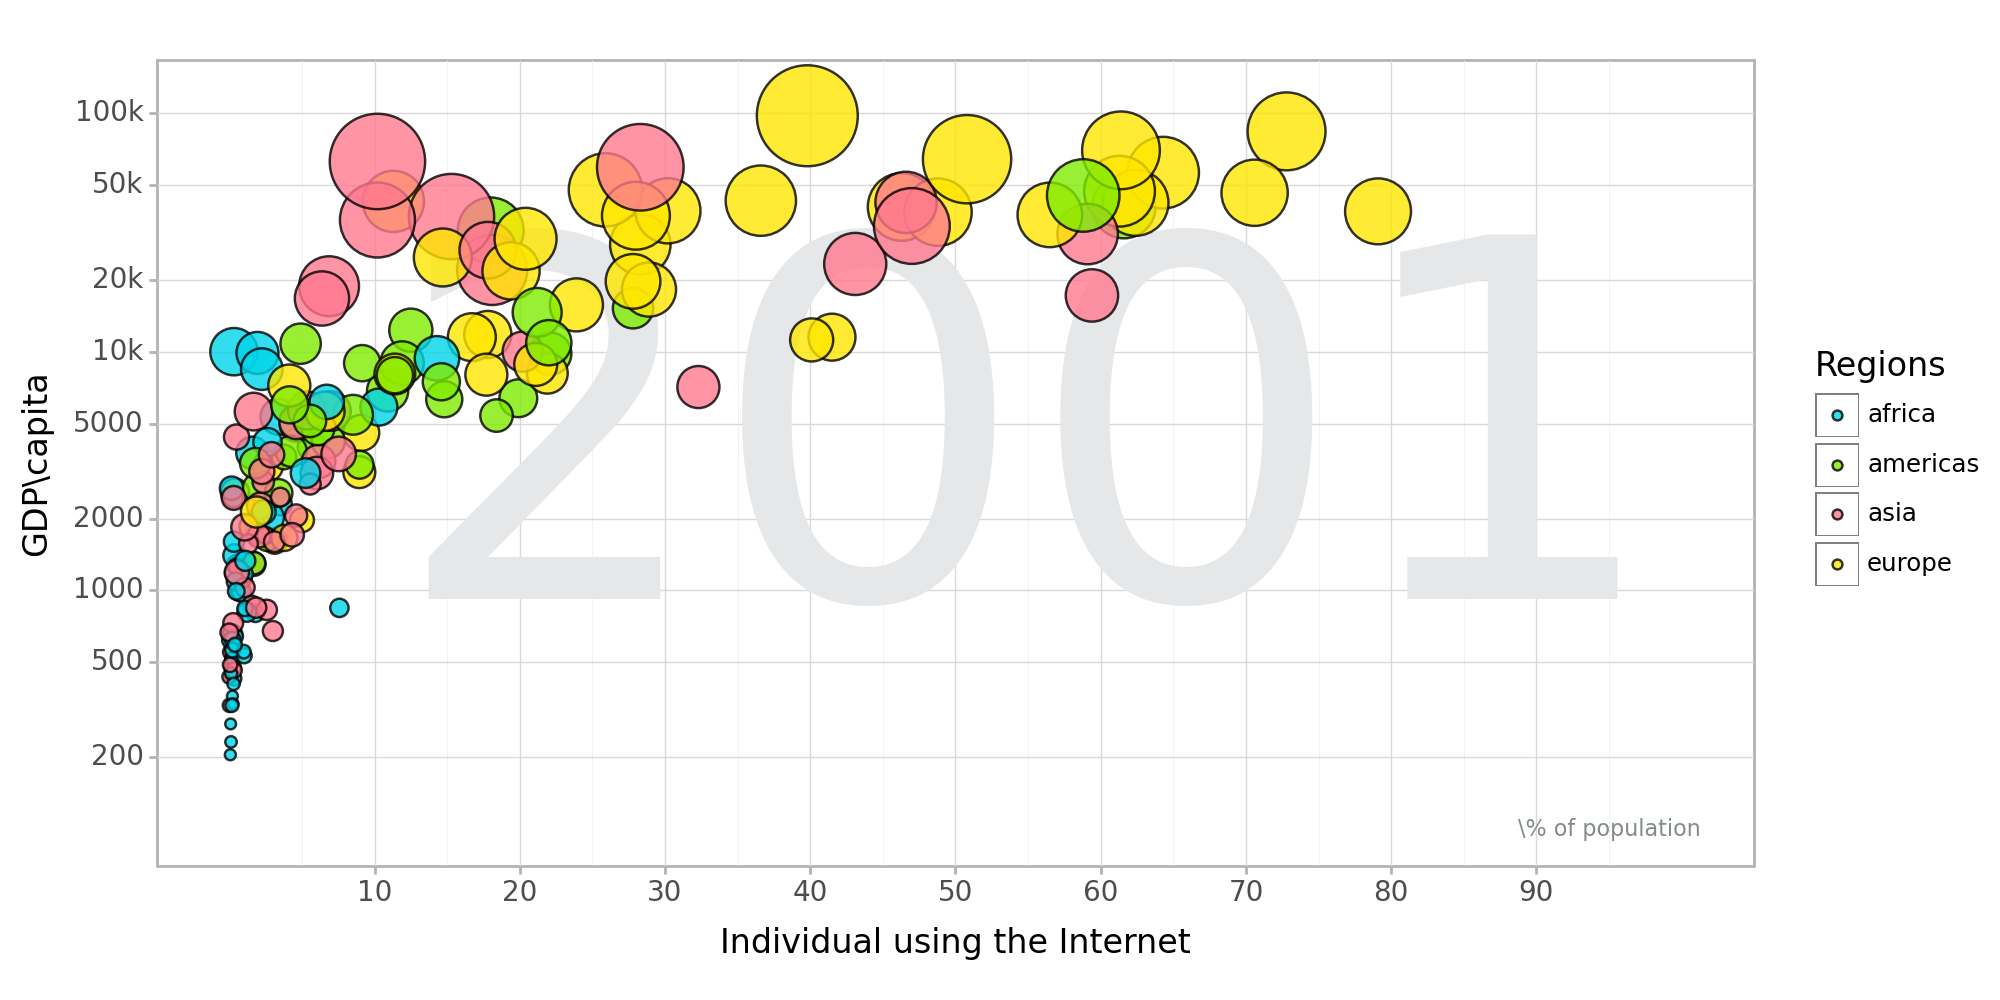

In [30]:
from plotnine import ggplot, geom_point, aes, ylab, xlab, theme_light, scale_fill_manual, guides

# Filter out rows with NaN values in the relevant columns, create a deep copy to avoid SettingWithCopyWarning
filtered3 = gapminder_3.dropna(subset=["internet_users", "gdp", "income", "four_regions"]).copy()

plot3 = (
    
    ggplot(filtered3, aes(x="internet_users", y="gdp", fill="four_regions", size = 'income'))
    
    + annotate("text", x=95, y=100, label="\% of population", color = '#838B8B', size=8, family="sans") 
    
    + annotate('text', x=55, y=3500, label='2001', color = '#E5E7E8', size=180, family="sans")

    + geom_point(alpha=0.8)  # Adjusting transparency
    
    # Size Adjustment for the Scatterplots
    + scale_size_area(max_size=20) 
    

    # X-Axis
    + scale_x_continuous(
        limits = ([0,100]),
                    breaks=([10, 20, 30, 40, 50, 60, 70, 80, 90]), 
                    labels = [10, 20, 30, 40, 50, 60, 70, 80, 90],
                    )
    
    
    
    # Y-Axis
    + scale_y_continuous(
                    limits = ([100,117000]),
                    breaks=([200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]), 
                    labels = [200, 500, 1000, 2000, 5000, "10k", "20k", "50k", "100k"],
                    trans = 'log2'
                    )
    
    
    + scale_fill_manual(values=region_colors_plot1, name="Regions")  # Using custom colors
   
   
    + theme_light()  # Using a light theme
    
    #Re-Adjusting the size of the plot 
    + theme(figure_size=(10,5))
   
   
    + theme(
        legend_position="right",  # Positioning the legend to the right
        legend_title=element_text(size=12),  # Adjusting legend title size
        axis_title=element_text(size=12),  # Adjusting axis title size
        axis_text=element_text(size=10)  # Adjusting axis text size
    )
    + xlab("Individual using the Internet")
    + ylab("GDP\\capita")
    + guides(size=False)
    
    
)

print(plot3)

4- What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

In the case of the internet usage, I decided to seperate the plot into four seperate sections. All the nations are categorized with within smaller plots into 4 bins. 

First group: 0-25% internet usage, Second group: 25%-50% internet usage and... 

By makeing the follwing change, we can get a more detialed analysis on each country internet usage % and compare their GDP with other nations with similar internet usages among their population. However, the downside of this method would be that it could be a bit more challenging to find a correlation between the GDP per capita and % of internet usage for all the countries in the dataset. 


c:\Users\mehrp\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


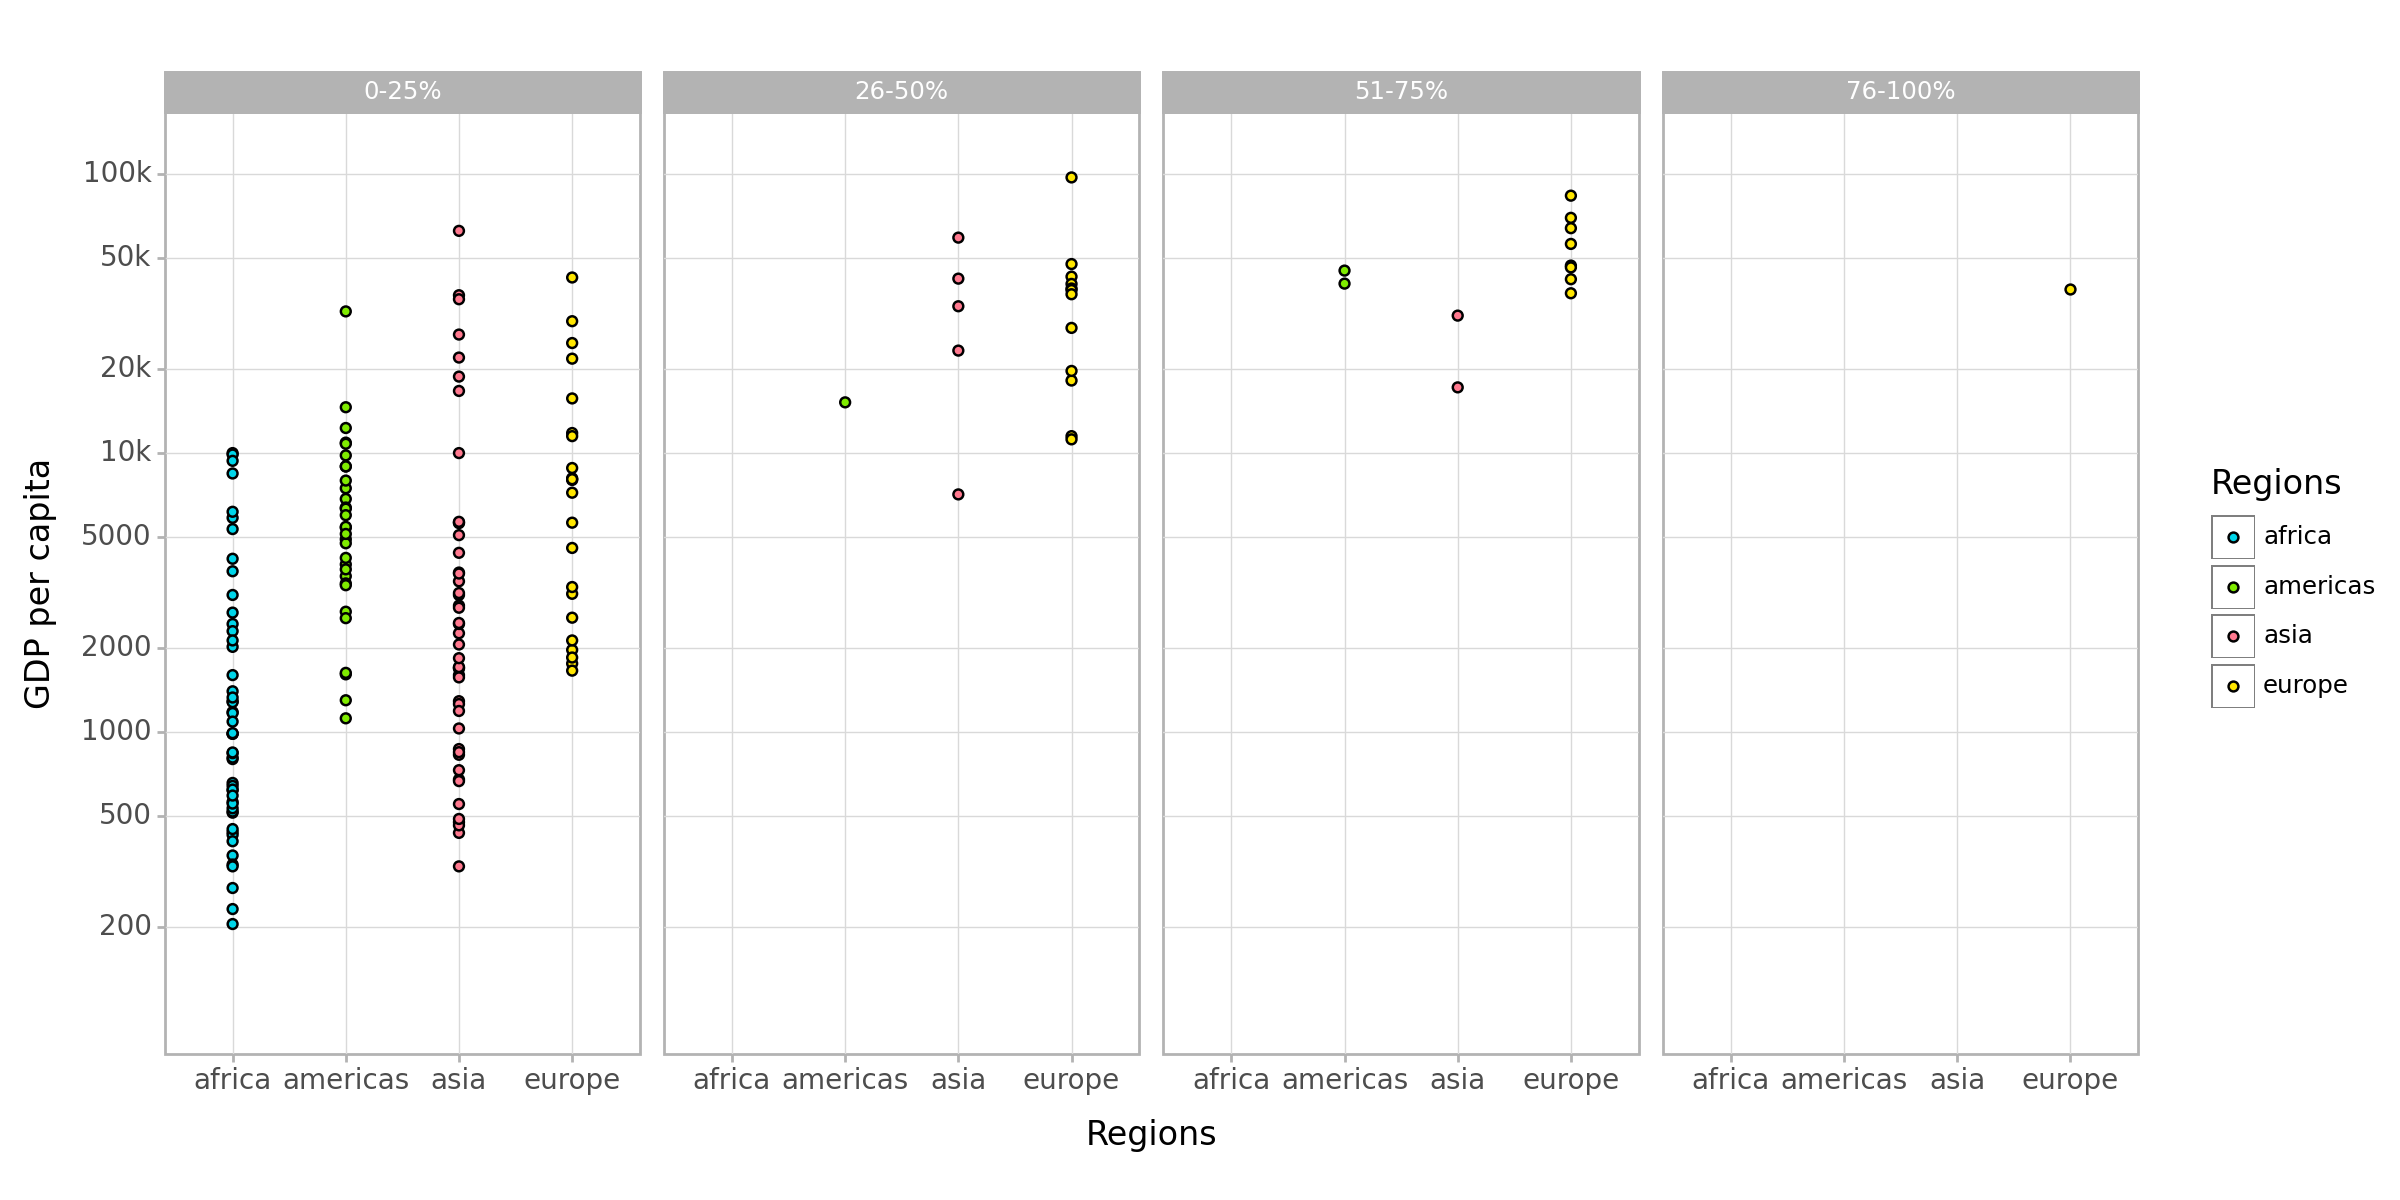

In [31]:
from plotnine import ggplot, geom_point, aes, ylab, xlab, theme_light, scale_fill_manual, guides

# Filter out rows with NaN values in the relevant columns, create a deep copy to avoid SettingWithCopyWarning
filtered3 = gapminder_3.dropna(subset=["internet_users", "gdp", "income", "four_regions"]).copy()

# Categories based on internet usage %
bins = [0, 25, 50, 75, 100]
labels = ["0-25%", "26-50%", "51-75%", "76-100%"]
filtered3['internet_usage_category'] = pd.cut(filtered3['internet_users'], bins=bins, labels=labels, right=False)

# Colors for the regions
region_colors_plot1 = {
    'europe': '#FFE600',
    'asia': '#FF798F',
    'americas': '#7FEB00',
    'africa': '#00D5E9'
}

plot6 = (
    ggplot(filtered3, aes(x="four_regions", y="gdp", fill="four_regions"))
    + geom_point()  # Violin plot
    
    + facet_wrap("~internet_usage_category", nrow=1)  # Facet by internet usage category
    
    # Y-Axis
    + scale_y_continuous(
        limits = ([100,117000]),
        breaks = [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000], 
        labels = [200, 500, 1000, 2000, 5000, "10k", "20k", "50k", "100k"],
        trans = 'log2'
    )
    
    + scale_fill_manual(values=region_colors_plot1, name="Regions")  # Using custom colors
    + theme_light()  # Using a light theme
    + theme(figure_size=(12, 6), legend_position="right", legend_title=element_text(size=12), axis_title=element_text(size=12), axis_text=element_text(size=10))
    + xlab("Regions")
    + ylab("GDP per capita")
)

print(plot6)